In [25]:
import os
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

In [44]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from tensorflow.keras.preprocessing import image

In [3]:
input_path=r'\Users\vasan\Documents\BrainTumour\YorN\archive\brain_tumor_dataset'
paths=[]
for file in os.listdir(input_path):
    path_str=input_path+"\\"+file
    paths.append(str(path_str))

In [4]:
for path in paths:
    print(path)

\Users\vasan\Documents\BrainTumour\YorN\archive\brain_tumor_dataset\test
\Users\vasan\Documents\BrainTumour\YorN\archive\brain_tumor_dataset\train
\Users\vasan\Documents\BrainTumour\YorN\archive\brain_tumor_dataset\val


In [22]:
val_path=paths[2]
train_path=paths[1]

In [6]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5]
                            )

In [7]:
train_gen= datagen.flow_from_directory(train_path,
                                       target_size=(224,224),
                                       class_mode='binary'
                                      )
val_gen = datagen.flow_from_directory( val_path,
                                       target_size=(224,224),
                                       class_mode='binary'
                                      )

Found 204 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [8]:
vgg_model=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)
model=keras.Sequential()
for layer in vgg_model.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable=False

In [9]:
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

## Without implementing EarlyStopping

In [12]:
history=model.fit(train_gen,validation_data=val_gen,epochs=50,callbacks=[checkpoint])

Epoch 1/50
7/7 [==============================] - 21s 2s/step - loss: 1.8842 - accuracy: 0.6078 - val_loss: 0.3245 - val_accuracy: 0.8750
Epoch 2/50
7/7 [==============================] - 3s 454ms/step - loss: 0.6131 - accuracy: 0.7206 - val_loss: 0.4041 - val_accuracy: 0.7917
Epoch 3/50
7/7 [==============================] - 3s 467ms/step - loss: 0.3854 - accuracy: 0.8088 - val_loss: 0.4207 - val_accuracy: 0.7917
Epoch 4/50
7/7 [==============================] - 3s 449ms/step - loss: 0.3652 - accuracy: 0.8382 - val_loss: 0.3200 - val_accuracy: 0.7917
Epoch 5/50
7/7 [==============================] - 3s 445ms/step - loss: 0.3082 - accuracy: 0.8431 - val_loss: 0.3953 - val_accuracy: 0.7917
Epoch 6/50
7/7 [==============================] - 3s 450ms/step - loss: 0.3686 - accuracy: 0.8382 - val_loss: 0.3672 - val_accuracy: 0.8333
Epoch 7/50
7/7 [==============================] - 3s 460ms/step - loss: 0.2969 - accuracy: 0.8578 - val_loss: 0.3132 - val_accuracy: 0.7917
Epoch 8/50
7/7 [======

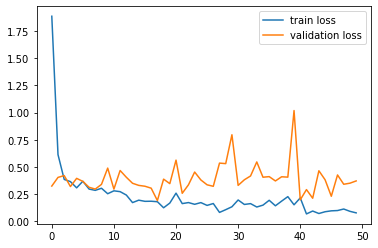

In [13]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

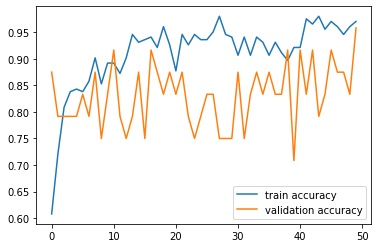

In [14]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()

In [20]:
model.save('final_model.h5')

In [21]:
new_model = tf.keras.models.load_model('final_model.h5')

In [55]:
def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    model = tf.keras.models.load_model('final_model.h5')
    prediction = model.predict(img_preprocessed)
    print(prediction)

In [74]:
test_path=paths[0]
test_gen = datagen.flow_from_directory( test_path,
                                       target_size=(224,224),
                                       class_mode='binary'
                                      )

Found 25 images belonging to 2 classes.


In [75]:
new_model.evaluate(test_gen)

1/1 [==============================] - 1s 587ms/step - loss: 0.4657 - accuracy: 0.8800


[0.46572887897491455, 0.8799999952316284]